## Shipboard ADCP data from Cruise 

In [1]:
import pandas as pd
import numpy as np
import scipy.io as spio
import matplotlib.pyplot as plt
import cmocean as cm
import cmocean.cm as cmo
import cartopy.feature as cfeature

import cartopy.crs as ccrs

import xarray as xr

In [2]:
ds = xr.open_dataset("os150nb.nc")

In [3]:
#ds

In [4]:
#can only run this once
ds['depth'] = ds['depth'].isel(time=0)
ds = ds.swap_dims({"depth_cell":"depth"})

Text(0.5, 0.98, 'Ship ADCP Data')

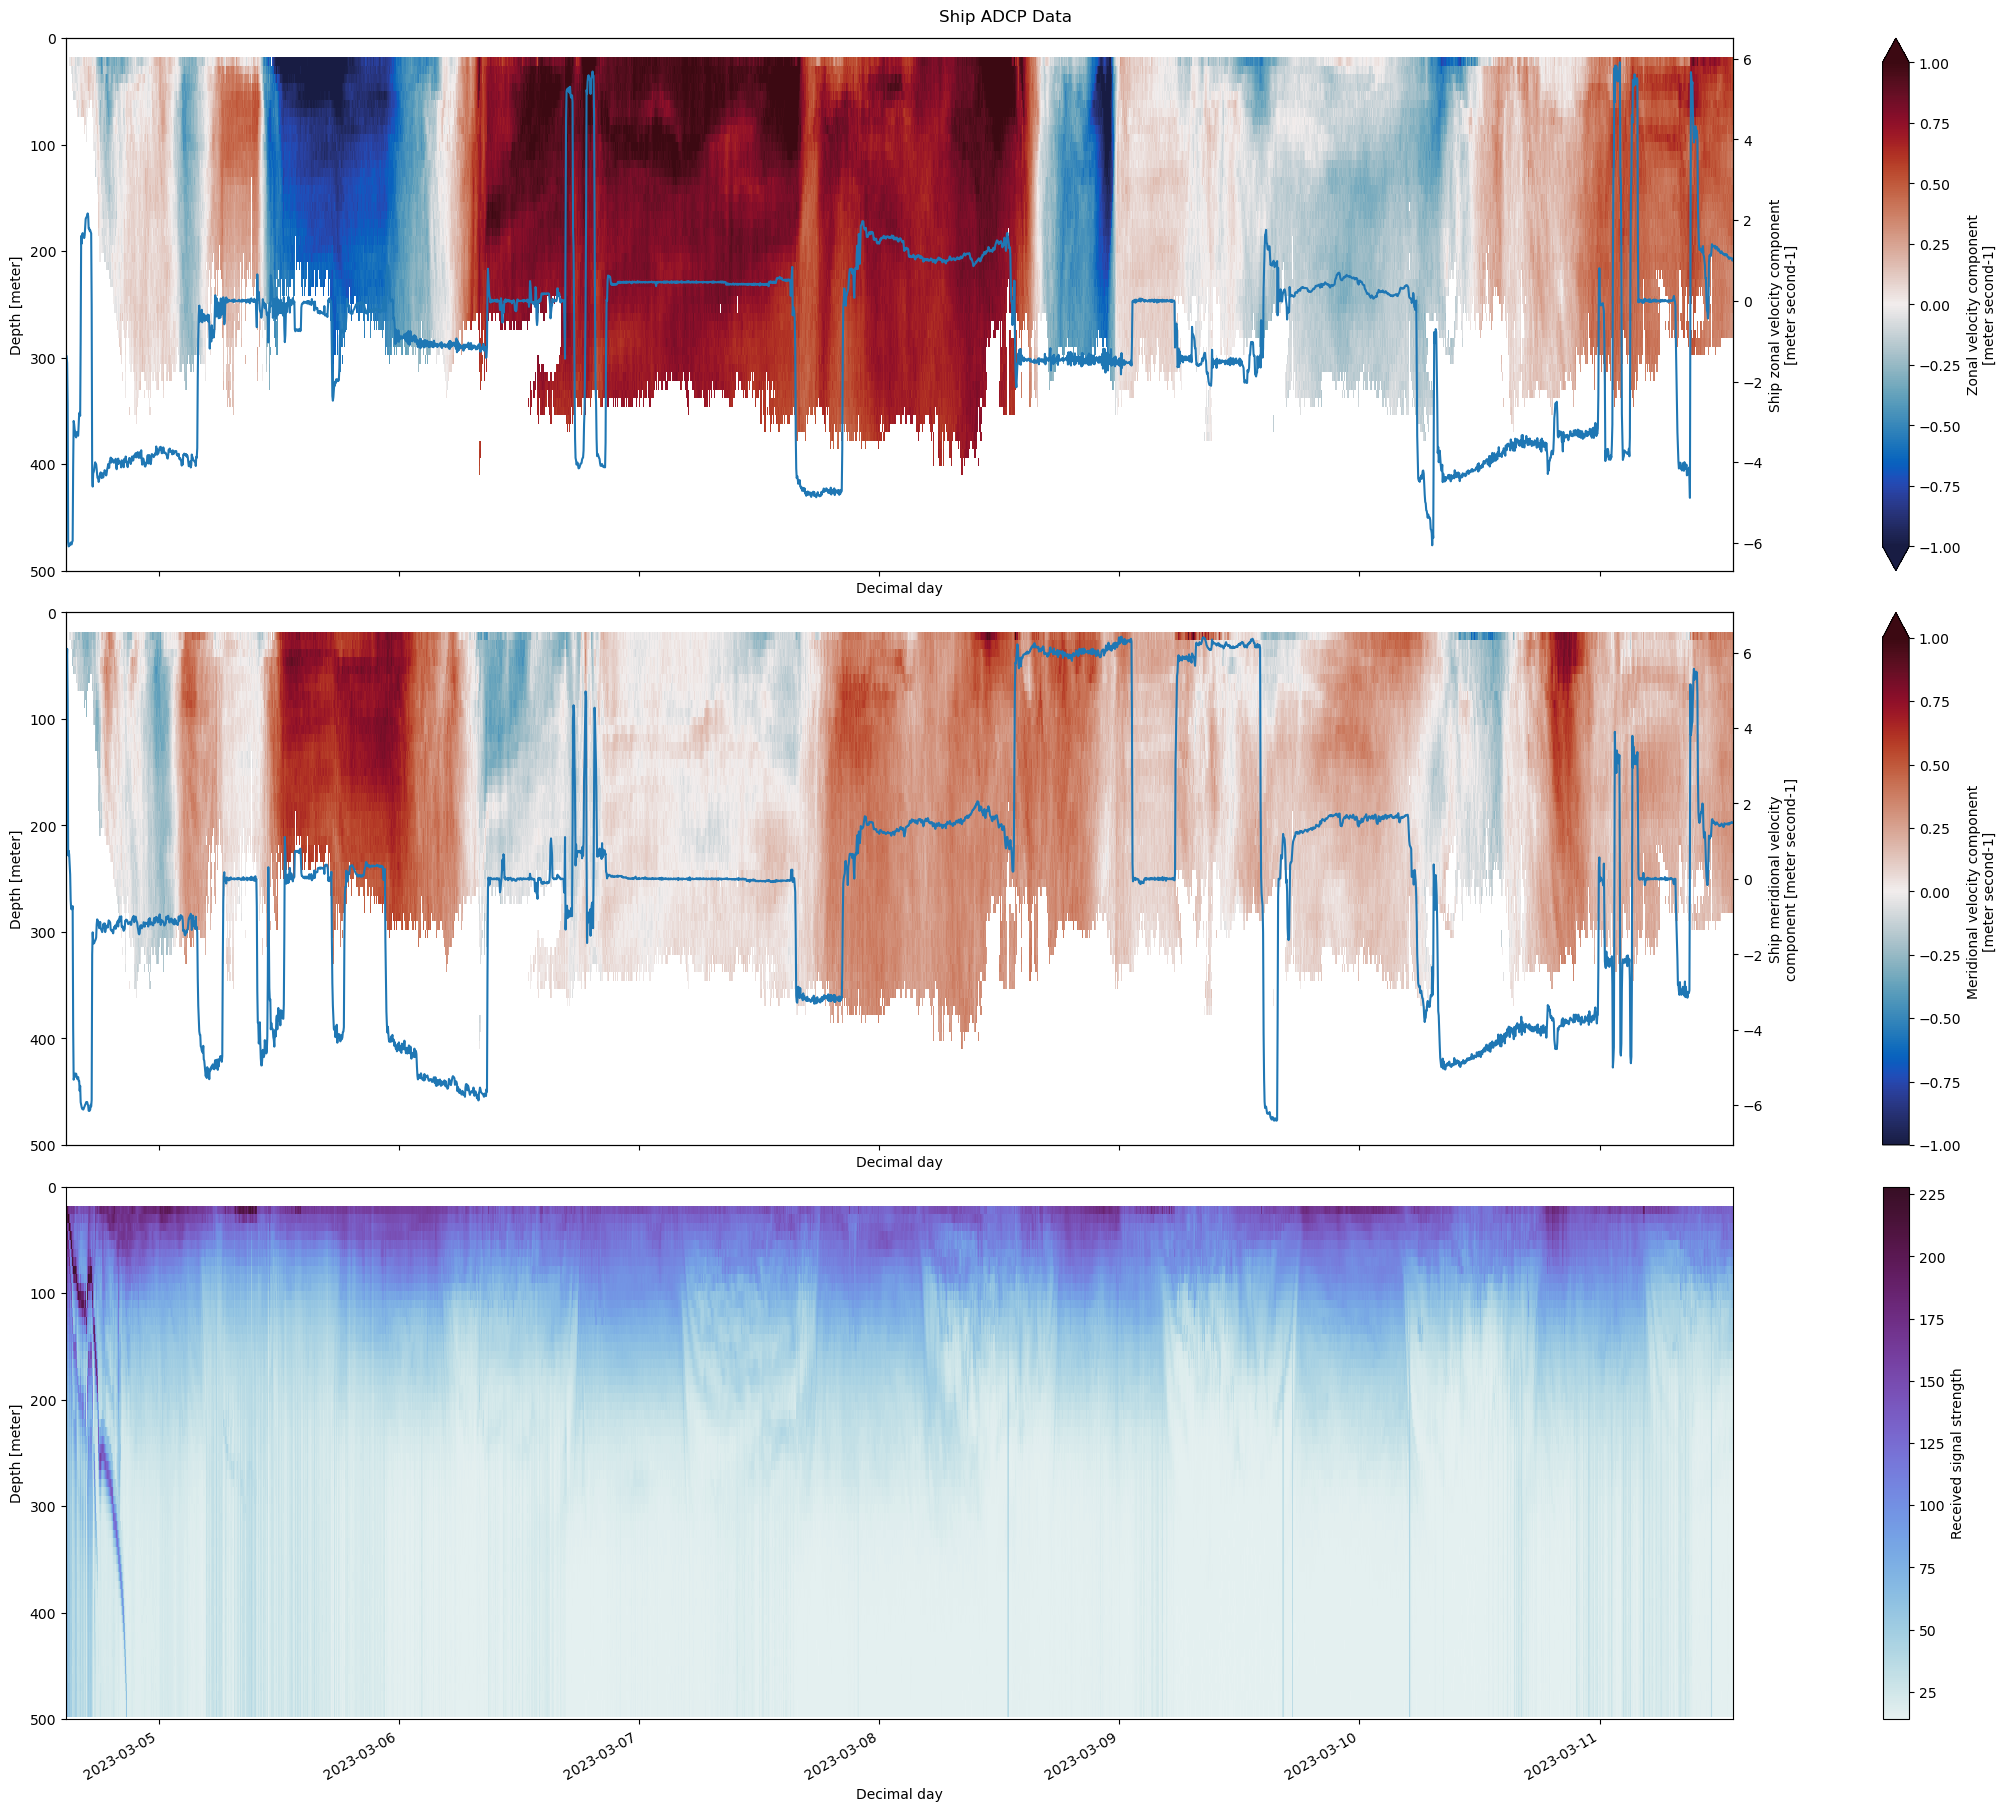

In [5]:
fig, (ax, bx, cx) = plt.subplots(3, 1, figsize=(20,18), sharex= True, constrained_layout = True)

var = ['u', 'v']

for i, vari in enumerate(var):
    ds[vari].plot(y="depth", ylim=(500,0), vmin=-1, vmax=1, cmap="cmo.balance", ax=[ax, bx][i])
    
ds["amp"].plot(y="depth", ylim=(500,0), cmap="cmo.dense", ax=cx)
dx = ax.twinx()
ds["uship"].plot(ax=dx)
ex = bx.twinx()
ds["vship"].plot(ax=ex)
fig.suptitle("Ship ADCP Data")

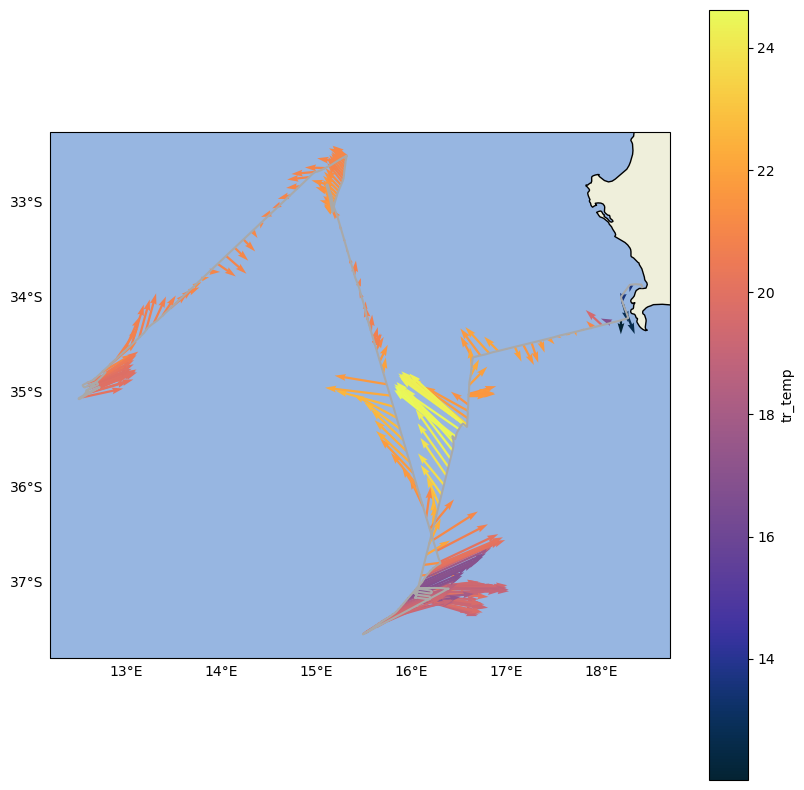

In [6]:
fig, ax = plt.subplots(figsize=(10,10), subplot_kw={"projection":ccrs.PlateCarree()})
ax.plot(ds.lon, ds.lat, c="darkgrey")
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
gl = ax.gridlines(lw =0, 
                  draw_labels=True)
gl.top_labels = False
gl.right_labels = False
ds.isel(time=np.arange(0,len(ds.time),12),
        depth=slice(0,100)).mean('depth').plot.quiver(x='lon',
                                                      y='lat',
                                                      u='u',
                                                      v='v',
                                                      scale=8,
                                                      pivot='tail', #make the arrow pivot on the tail
                                                      hue="tr_temp", 
                                                      cmap="cmo.thermal")

In [7]:
# in the mixed layer and below the mixed layer 

# plot ADCP data on a 3D plot of the ship track  